# Code for generating supplementary figure subpanels

# Figure A

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
plt.rc('font', family='Helvetica')

import warnings
warnings.filterwarnings('ignore')

In [3]:
h1299 = pd.read_csv('ARE-GFP_and_PEAR_flow_data/H1299_TBHQ_ARE-GFP.csv')

col_dict = {"singlets | Count":"live_cells",	"singlets/singlets2/singlets3/BFP+ | Freq. of Parent (%)":"BFP+ %",	"singlets/singlets2/singlets3/BFP+/GFP+ | Freq. of Parent (%)":"GFP+ %"}

h1299 = h1299.rename(columns = col_dict)[:-2]

treatment = ['None', 'None', 'None',
             'BSO','BSO','BSO',
             'BSO','BSO','BSO',
             'BSO','BSO','BSO',
             'BSO','BSO','BSO',
             'TBHQ', 'TBHQ', 'TBHQ',
             'TBHQ', 'TBHQ', 'TBHQ',
             'TBHQ', 'TBHQ', 'TBHQ',
             'TBHQ', 'TBHQ', 'TBHQ',
             ]

concentration = [0,0,0,
                 0,0,0,
                 10,10,10,
                 50,50,50,
                 500,500,500,
                 0,0,0,
                 5,5,5,
                 10,10,10,
                 50,50,50]

h1299['treatment'] = treatment
h1299['concentration (uM)'] = concentration


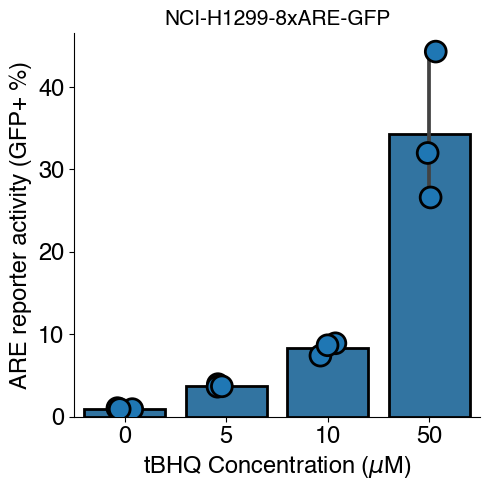

In [4]:
#plotting GFP+ %

fig, ax = plt.subplots(figsize=(5,5))
tbhq = h1299[h1299['treatment']=='TBHQ']


g = sns.barplot(data=tbhq, x='concentration (uM)', y='GFP+ %',edgecolor='black', linewidth=2, ax=ax,palette=['tab:blue'])
g = sns.stripplot(data=tbhq, x='concentration (uM)', y='GFP+ %',dodge=False, s=15, edgecolor='black', linewidth=2, ax=ax,palette=['tab:blue'])


ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set_ylabel('ARE reporter activity (GFP+ %)', fontsize=17)
ax.set_xlabel('tBHQ Concentration ($\mu$M)', fontsize=17)

ax.set_title('NCI-H1299-8xARE-GFP', fontsize=15)

fig.tight_layout()
#fig.savefig('ARE_reporter.pdf')

# Figure B

In [5]:
h1299_d3 = pd.read_csv('ARE-GFP_and_PEAR_flow_data/H1299_d3.csv')
h1299_d7 = pd.read_csv('ARE-GFP_and_PEAR_flow_data/H1299_d7.csv')

col_dict = {"singlets/singlets2/singlets3/RFP+ | Freq. of Parent (%)":"RFP+ %",	"singlets/singlets2/singlets3/RFP+/GFP+ | Freq. of Parent (%)":"GFP+ %"}

#exclude the mean and std rows
#and also the colorless row (last row)
h1299_d3 = h1299_d3.rename(columns = col_dict)[:-3]
h1299_d7 = h1299_d7.rename(columns = col_dict)[:-3]

class1 = ['H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax','H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax','H1299-PE7', 'H1299-PE7','H1299-PE7','H1299-PE7', 'H1299-PE7','H1299-PE7', 'H1299-WT', 'H1299-WT', 'H1299-WT',]

class3 = ['H1299-PE7', 'H1299-PE7','H1299-PE7','H1299-PE7', 'H1299-PE7','H1299-PE7', 'H1299-WT', 'H1299-WT', 'H1299-WT','H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax','H1299-PEmax', 'H1299-PEmax', 'H1299-PEmax',]

class4 = ['H1299-PE7\n5 ug/mL puro', 'H1299-PE7\n5 ug/mL puro','H1299-PE7\n5 ug/mL puro','H1299-PE7\n10 ug/mL puro', 'H1299-PE7\n10 ug/mL puro','H1299-PE7\n10 ug/mL puro', 
          'H1299-WT', 'H1299-WT', 'H1299-WT','H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro','H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro',]

class5 = ['H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro', 'H1299-PEmax\n5 ug/mL puro','H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro', 'H1299-PEmax\n10 ug/mL puro',
          'H1299-PE7\n5 ug/mL puro', 'H1299-PE7\n5 ug/mL puro','H1299-PE7\n5 ug/mL puro','H1299-PE7\n10 ug/mL puro', 'H1299-PE7\n10 ug/mL puro','H1299-PE7\n10 ug/mL puro', 
          'H1299-WT', 'H1299-WT', 'H1299-WT',]

h1299_d3['Cell Type'] = 'H1299'
h1299_d7['Cell Type'] = 'H1299'

h1299_d3['Days Post-Transduction'] = 4
h1299_d7['Days Post-Transduction'] = 7

h1299_d3['Condition'] = class1
h1299_d3['Puro Concentration'] = [5,5,5,10,10,10,5,5,5,10,10,10,0,0,0]
h1299_d3['Cell Line'] = class5

h1299_d7['Condition'] = class3
h1299_d7['Puro Concentration'] = [5,5,5,10,10,10,0,0,0,5,5,5,10,10,10]
h1299_d7['Cell Line'] = class4


pear = pd.concat(( h1299_d3,h1299_d7)).drop(columns = 'Unnamed: 3')

pear_selected = pear[pear['Cell Line'].isin(['H1299-PE7\n10 ug/mL puro', 'H1299-WT'])]

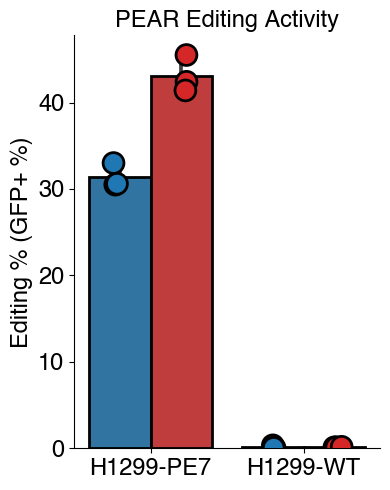

In [6]:
fig, ax = plt.subplots(figsize=(4,5))

hue_order=[4,7]

g = sns.barplot(data=pear_selected,x='Condition', y='GFP+ %', hue='Days Post-Transduction', edgecolor='black', linewidth=2, ax=ax, hue_order=hue_order, palette=['tab:blue', 'tab:red', 'tab:green', 'tab:purple'])
g = sns.stripplot(data=pear_selected,x='Condition', y='GFP+ %', dodge=True, s=15,edgecolor='black', linewidth=2,hue='Days Post-Transduction', hue_order=hue_order,ax=ax, palette=['tab:blue', 'tab:red', 'tab:green', 'tab:purple'], legend=False)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set_ylabel('Editing % (GFP+ %)', fontsize=17)
ax.set_xlabel('')
ax.legend_.remove()

#ax.legend(title='Days\nPost-Transduction',fontsize=15, loc='upper right')
ax.set_title('PEAR Editing Activity', fontsize=17)
fig.tight_layout()
#fig.savefig('PEAR_reporter.pdf')

# Figure C

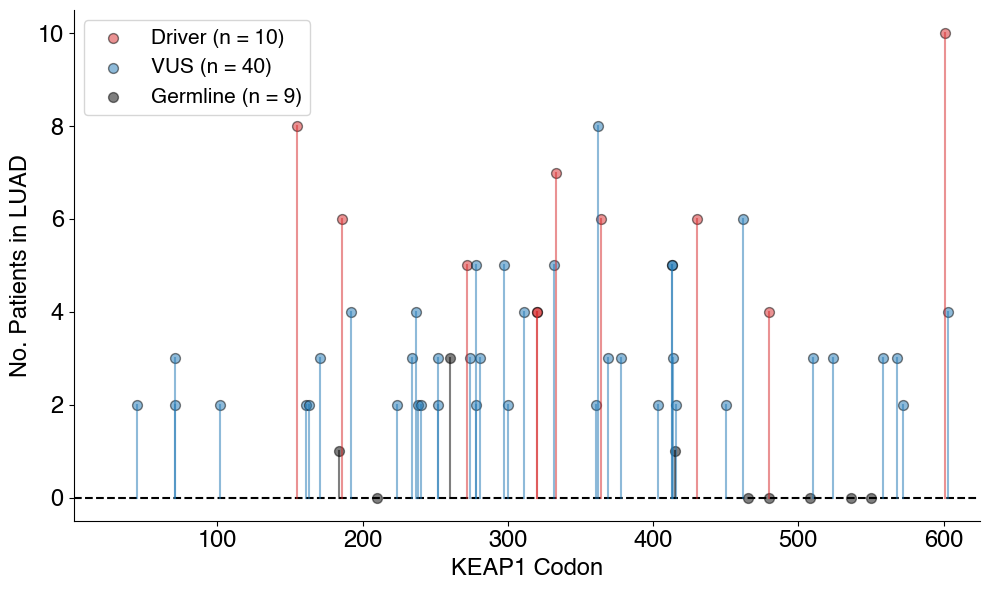

In [7]:
library = pd.read_csv('KEAP1_NRF2_library.csv')
jj = library[library['peg_type']=='keap1_targeting'].drop_duplicates(subset='HGVSp')


d = jj[jj['classification']=='driver']
v = jj[jj['classification']=='VUS']
g = jj[jj['classification']=='germline']

fig, ax = plt.subplots(figsize=(10,6))
ax.plot([1,624], [0,0], linestyle='dashed', color='black')
ax.set_xlim(1,625)


for i, val in d.iterrows():
    ax.plot([val['codon'], val['codon']], [0, val['n_patients_in_LUAD']], color='tab:red',alpha=.5)
    
for i, val in v.iterrows():
    ax.plot([val['codon'], val['codon']], [0, val['n_patients_in_LUAD']], color='tab:blue',alpha=.5)  

for i, val in g.iterrows():
    ax.plot([val['codon'], val['codon']], [0, val['n_patients_in_LUAD']], color='black',alpha=.5)  

ax.scatter(d['codon'], d['n_patients_in_LUAD'], color='tab:red', label='Driver (n = 10)',edgecolor='black', s=50,alpha=.5)
ax.scatter(v['codon'], v['n_patients_in_LUAD'], color='tab:blue', label='VUS (n = 40)', edgecolor='black', s=50,alpha=.5)
ax.scatter(g['codon'], g['n_patients_in_LUAD'], color='black', label='Germline (n = 9)', edgecolor='black', s=50,alpha=.5)


ax.set_ylabel('No. Patients in LUAD', fontsize=17)
ax.set_xlabel('KEAP1 Codon', fontsize=17)
#plt.scatter()
ax.legend(fontsize=15, loc='upper left')
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=17)
fig.tight_layout()
#fig.savefig('mutant_codons.pdf')

# Figure D

In [8]:
fp = 'count_tables'
l = os.listdir(fp)

counts = sorted([i for i in l if "count" in i])
classif = sorted([i for i in l if "classification" in i])

d = {'D24-8256' : 'REP1-Q1',
'D24-8257' : 'REP1-Q2',
'D24-8258' : 'REP1-Q3',
'D24-8259' : 'REP1-Q4', 
'D24-8260' : 'REP2-Q1',
'D24-8261' : 'REP2-Q2',
'D24-8262' : 'REP2-Q3',
'D24-8263' : 'REP2-Q4',
'D24-8264' : 'REP3-Q1',
'D24-8265' : 'REP3-Q2',
'D24-8266' : 'REP3-Q3',
'D24-8267' : 'REP3-Q4',
'D24-8268' : 'REP1-Pre-Sort',
'D24-8269' : 'REP2-Pre-Sort',
'D24-8270' : 'REP3-Pre-Sort',
'D24-8271' : 'Plasmid Library'}

count_dfs = []
count_totals = []
count_names = []
class_dfs = []
class_names = []

for i in counts:
    n = i[:8]
    id = d[n]
    a = pd.read_csv(f'{fp}/{i}')
    count_dfs.append(a)
    count_names.append(id)
    count_totals.append(np.array(a['total']))

for x in classif:
    a = pd.read_csv(f'{fp}/{x}')
    class_dfs.append(a)

count_table = pd.DataFrame(dict(zip(count_names, count_totals)))

In [9]:
h = []
for i, val in enumerate(class_dfs):
    b = class_dfs[i].T
    b.columns = b.iloc[0]
    b = b.iloc[1]
    b['Sample'] = count_names[i]
    h.append(b)

c2 = pd.DataFrame(h)
c2['correct_id_perc'] = 100*c2['correct_id']/c2['good_quality']
c2['unaligned_perc'] = 100*c2['unaligned']/c2['good_quality']
c2['unidentified_perc'] = 100*c2['unidentified']/c2['good_quality']

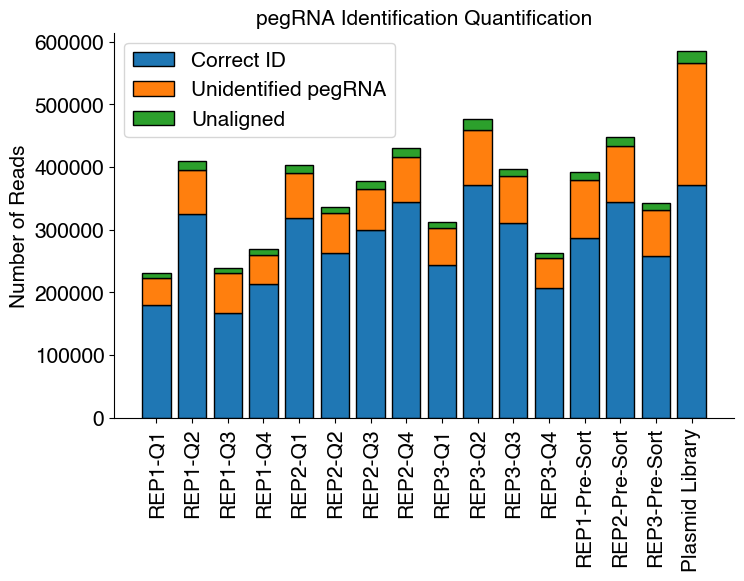

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x=c2['Sample'], height=c2['correct_id'], label='Correct ID', linewidth=1, edgecolor='black')
ax.bar(x=c2['Sample'], bottom=c2['correct_id'], height = c2['unidentified'], label='Unidentified pegRNA', linewidth=1, edgecolor='black')
ax.bar(x=c2['Sample'], bottom=c2['correct_id'] + c2['unidentified'], height = c2['unaligned'], label='Unaligned', linewidth=1, edgecolor='black')

ax.legend(fontsize=15)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('Number of Reads', fontsize=15)
ax.set_title('pegRNA Identification Quantification', fontsize=15);
#fig.savefig('pegRNA_id_counts.pdf')

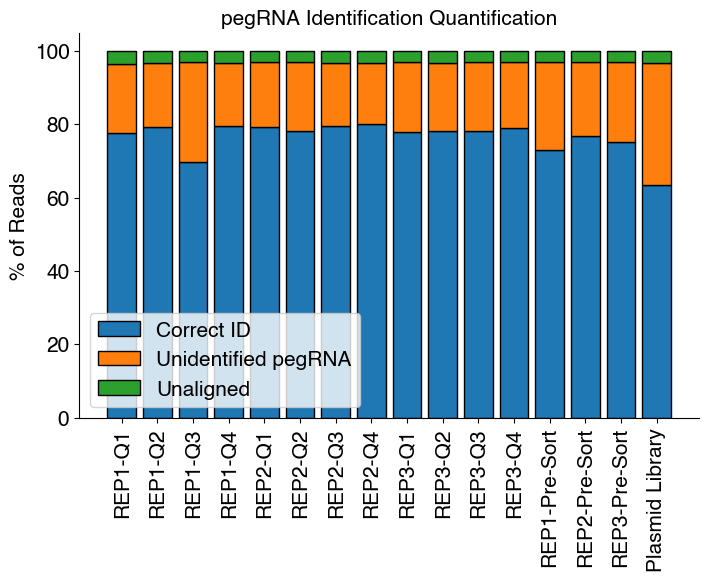

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x=c2['Sample'], height=c2['correct_id_perc'], label='Correct ID', linewidth=1, edgecolor='black')
ax.bar(x=c2['Sample'], bottom=c2['correct_id_perc'], height = c2['unidentified_perc'], label='Unidentified pegRNA', linewidth=1, edgecolor='black')
ax.bar(x=c2['Sample'], bottom=c2['correct_id_perc'] + c2['unidentified_perc'], height = c2['unaligned_perc'], label='Unaligned', linewidth=1, edgecolor='black')

ax.legend(fontsize=15)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('% of Reads', fontsize=15)
ax.set_title('pegRNA Identification Quantification', fontsize=15);
#fig.savefig('pegRNA_id_perc.pdf')

# Figure E

In [12]:
cd = dict(zip(count_names, count_dfs))

r1 = []
for i in count_names:
    a = cd[i]
    r1.append(np.sum(a, axis=0)[1:])

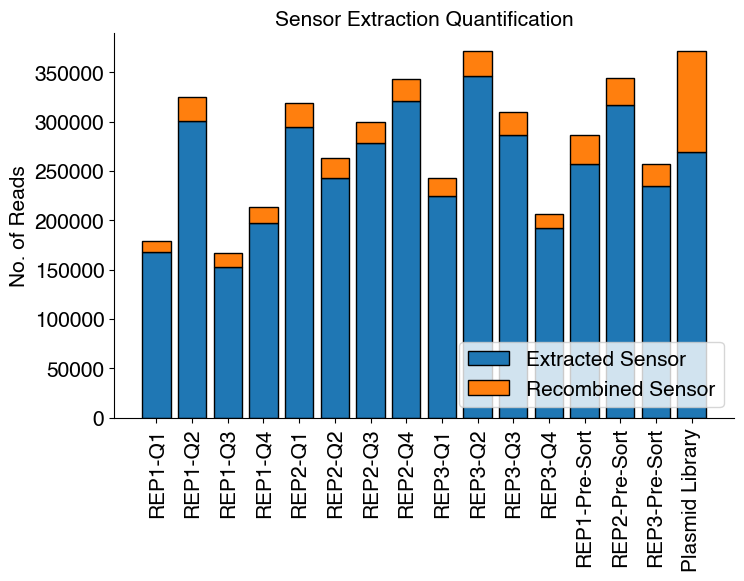

In [13]:
c1 = pd.DataFrame(r1)
c1['Sample'] = count_names
c1['extracted_perc'] = 100*c1['extracted']/c1['total']
c1['recombined_perc'] = 100*c1['recombined']/c1['total']

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x=c1['Sample'], height=c1['extracted'], label='Extracted Sensor', linewidth=1, edgecolor='black')
ax.bar(x=c1['Sample'], bottom=c1['extracted'], height = c1['recombined'], label='Recombined Sensor', linewidth=1, edgecolor='black')
ax.legend(fontsize=15, loc='lower right')
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('No. of Reads', fontsize=15)
ax.set_title('Sensor Extraction Quantification', fontsize=15);
#fig.savefig('sensor_id_counts.pdf')

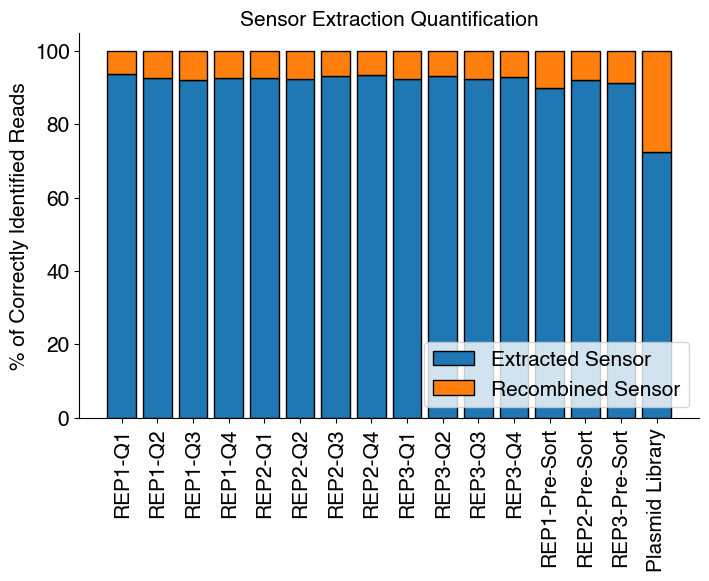

In [14]:
c1 = pd.DataFrame(r1)
c1['Sample'] = count_names
c1['extracted_perc'] = 100*c1['extracted']/c1['total']
c1['recombined_perc'] = 100*c1['recombined']/c1['total']

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x=c1['Sample'], height=c1['extracted_perc'], label='Extracted Sensor', linewidth=1, edgecolor='black')
ax.bar(x=c1['Sample'], bottom=c1['extracted_perc'], height = c1['recombined_perc'], label='Recombined Sensor', linewidth=1, edgecolor='black')
ax.legend(fontsize=15,  loc='lower right')
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('% of Correctly Identified Reads', fontsize=15)
ax.set_title('Sensor Extraction Quantification', fontsize=15);
#fig.savefig('sensor_id_perc.pdf')